<a href="https://colab.research.google.com/github/Nimishajain77/39_SANS_2/blob/sheryl/DiseaseDetectionIntegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls gdrive/MyDrive

 05_SherylBellary.gdoc
 ai6.gdoc
 archive.zip
 Attendance.gdoc
'Colab Notebooks'
'CONVOLUTION  V S  INVOLUTION.gdoc'
'COUNCIL 2022-23.gsheet'
'How to get started with Drive.pdf'
 python
 Reptile.ipynb
 SherylBellary_Resume.pdf
'Shirin_Bellary_Resume (1) (1).gdoc'
'Shirin_Bellary_Resume (1) (1).pdf'
'Shirin_Bellary_Resume (1) (2).gdoc'
'Shirin_Bellary_Resume (1) (2).pdf'
'Shirin_Bellary_Resume (1) (3).pdf'
'Shirin_Bellary_Resume (1).gdoc'
'Shirin_Bellary_Resume (1).pdf'
 tableau.gsheet
'Tableau Workshop Registration Desk.gsheet'
'Untitled document.gdoc'
'Untitled spreadsheet (1).gsheet'
'Untitled spreadsheet.gsheet'
 Vini


In [3]:
!unzip gdrive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [4]:
!pip install keras.applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.4 MB/s 


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

import keras

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [6]:
len(os.listdir('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'))

38

In [7]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=True)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [8]:
train = train_datagen.flow_from_directory(directory='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                          target_size = (256,256),
                                          batch_size=32)

val = val_datagen.flow_from_directory(directory='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                          target_size= (256,256),
                                          batch_size=32)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [9]:
t_img, label = train.next()

In [10]:
t_img.shape

(32, 256, 256, 3)

In [11]:
def plotImage(img_arr, label):

  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/255)
    plt.show()

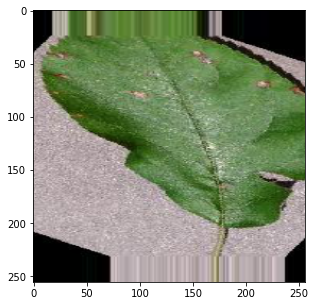

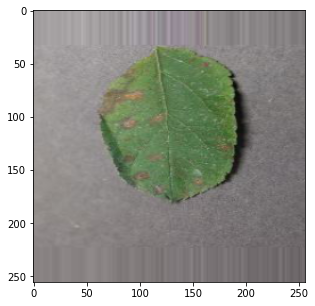

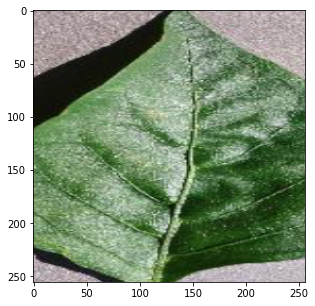

In [12]:
plotImage(t_img[:3], label[:3])

building model

In [13]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [14]:
base_model = VGG19(input_shape=(256,256,3), include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [15]:
for layer in base_model.layers:
  layer.trainable = False

In [16]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [17]:
X = Flatten()(base_model.output)

X = Dense(units = 38, activation='softmax')(X)

#creating model
model = Model(base_model.input, X)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [19]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

es and mc

In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping 

es = EarlyStopping(monitor = 'val_accuracy', min_delta=0.01, patience=3, verbose=1)

mc= ModelCheckpoint(filepath="best_model.h5",
                    monitor='val_accuracy',
                    patience= 3,
                    verbose=1,
                    save_best_only=True)

cb = [es,mc]

In [21]:
his = model.fit_generator(train,
                          steps_per_epoch= 16,
                          epochs= 50,
                          verbose = 1,
                          callbacks=cb,
                          validation_data=val,
                          validation_steps=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 38.8668 - accuracy: 0.1660
Epoch 1: val_accuracy improved from -inf to 0.32812, saving model to best_model.h5
16/16 [==============================] - 26s 785ms/step - loss: 38.8668 - accuracy: 0.1660 - val_loss: 20.3303 - val_accuracy: 0.3281
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 21.4381 - accuracy: 0.4062
Epoch 2: val_accuracy improved from 0.32812 to 0.39258, saving model to best_model.h5
16/16 [==============================] - 12s 768ms/step - loss: 21.4381 - accuracy: 0.4062 - val_loss: 15.8746 - val_accuracy: 0.3926
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 21.2711 - accuracy: 0.4648
Epoch 3: val_accuracy improved from 0.39258 to 0.57422, saving model to best_model.h5
16/16 [==============================] - 12s 776ms/step - loss: 21.2711 - accuracy: 0.4648 - val_loss: 9.9121 - val_accuracy: 0.5742
Epoch 4/50
16/16 [==============================] - ETA: 0s

In [22]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

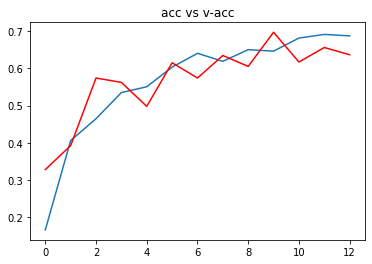

In [23]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title("acc vs v-acc")
plt.show()

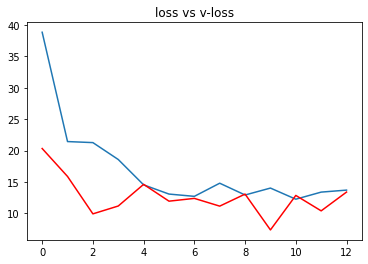

In [24]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title("loss vs v-loss")
plt.show()

load best model

In [25]:
from keras.models import load_model

model = load_model('/content/best_model.h5')

In [26]:
acc = model.evaluate_generator(val)[1]

print(f'The accuracy of your model is = {acc*100} %')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


The accuracy of your model is = 67.63032078742981 %


In [27]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [28]:
def prediction(path):

  img = load_img(path, target_size=(256,256))

  i = img_to_array(img)

  im = preprocess_input(i)

  img = np.expand_dims(im, axis=0)

  pred = np.argmax(model.predict(img))

  print(f" The image belongs to { ref[pred] }")

In [29]:
path = "/content/test/test/AppleCedarRust1.JPG"

prediction(path)

 The image belongs to Apple___Cedar_apple_rust


In [3]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 40.2 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=9b39c90255df32425ade691d5a8a79b5bf0015f293a046dc41a739c0f1498c1a
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [5]:
from pyngrok import ngrok 

In [6]:
ngrok.set_auth_token("2FZcEEGSI6eGspOq1NiSHLGPeLY_gi8csV5geLM2qqEPr6fn")
public_url = ngrok.connect(5000).public_url

ERROR:pyngrok.process.ngrok:t=2022-10-02T09:44:12+0000 lvl=eror msg="failed to auth" obj=tunnels.session err="Your account is limited to 1 simultaneous ngrok agent session.\nActive ngrok agent sessions in region 'us':\n  - ts_2FZdDcFmfNtTG2M0A35jeEZxD4i (35.227.98.86)\r\n\r\nERR_NGROK_108\r\n"
ERROR:pyngrok.process.ngrok:t=2022-10-02T09:44:12+0000 lvl=eror msg="failed to reconnect session" obj=csess id=b16d7556df5c err="Your account is limited to 1 simultaneous ngrok agent session.\nActive ngrok agent sessions in region 'us':\n  - ts_2FZdDcFmfNtTG2M0A35jeEZxD4i (35.227.98.86)\r\n\r\nERR_NGROK_108\r\n"


PyngrokNgrokError: ignored

In [40]:
import pickle

filename = 'CropPricePrediction.pkl'
pickle.dump(model,open(filename,'wb'))

model = pickle.load(open(filename,'rb'))

from flask import Flask, render_template, request, jsonify, render_template

app = Flask(__name__)
model = pickle.load(open(filename,'rb'))

@app.route('/')
def home():
  return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    #For rendering results on HTML GUI
    int_features = [float(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)
    output = round(prediction[0], 2)
    return render_template('index.html', prediction_text='The Best Price for your crop is:{}'.format(output))

@app.route('/predict_api',methods=['POST'])
def predict_api():
    #For rendering results on HTML GUI
    data = request.get_json(force=True)
    prediction = model.predict(np.array(list(data.values())))
    output = prediction[0]
    return jsonify(output)

from flask_ngrok import run_with_ngrok
from flask import Flask

app = Flask(__name__)
run_with_ngrok(app)   #starts ngrok when the app is run

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://aa84-34-86-129-231.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [02/Oct/2022 09:18:36] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [02/Oct/2022 09:18:36] "GET /favicon.ico HTTP/1.1" 404 -
